# Telco Customer Churn.

Customer Churn refers to the loss of customers due to voluntary/involuntary reasons

Start by importing our necessary libraries as well as loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
telco_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Get some info about the datset

In [3]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can the dataset has no null values

In [4]:
telco_data.shape

(7043, 21)

In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


However, we can see as above the column 'TotalCharges' is of data type 'object' instead of float. Covert it to float data type as show below

In [6]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors="coerce")

telco_data.TotalCharges.dtypes

dtype('float64')

However, by changing the column to float we have introduced null values into the column

In [7]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Remove the null values

In [8]:
telco_data.dropna(inplace = True)
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

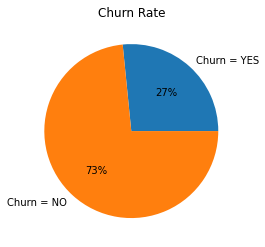

In [9]:
yesChurn = len(telco_data[telco_data.Churn=='Yes'])
noChurn = len(telco_data[telco_data.Churn=='No'])
churn = [yesChurn, noChurn]
labels = ['Churn = YES', 'Churn = NO']
plt.figure(figsize=(8,4))
plt.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Churn Rate')
plt.show()

In the above piechart, we can see that the dataset has Yes @ 27% and No @ 73%


          
   ## 1.(a). Which 2 demographics have proven to be the most popular with the telco brand?


As show in the figures below the to most popular demographis are SeniorCitizen & Dependents

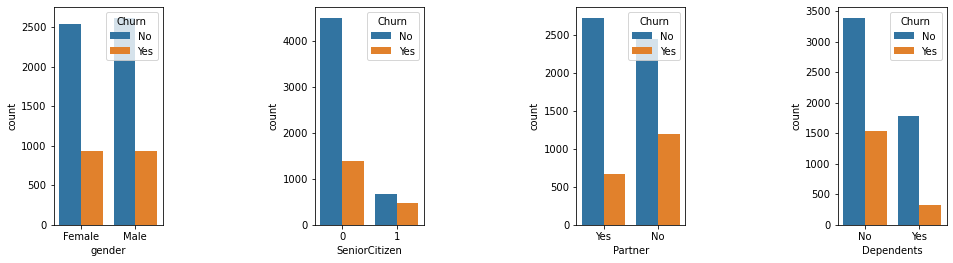

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(1,7,1)
sns.countplot(data=telco_data, x='gender', hue='Churn')
plt.subplot(1,7,3)
sns.countplot(data=telco_data, x='SeniorCitizen', hue='Churn')
plt.subplot(1,7,5)
sns.countplot(data=telco_data, x='Partner', hue='Churn')
plt.subplot(1,7,7)
sns.countplot(data=telco_data, x='Dependents', hue='Churn')
plt.show()

## 1.(b). If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

Customers with partner or dependents churn less than customers with no partner/dependents. Thus from the above figure, advertisements should target customers with no partners/dependents to boost retention

## 2.(a). Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis


In [11]:
ServiceCharge = telco_data.groupby(['PhoneService', 'InternetService','Contract','Churn'])['MonthlyCharges'].sum().reset_index(name='OverallMonthlyCharges')

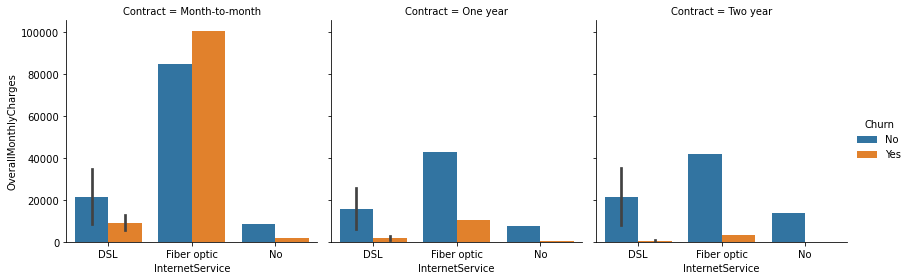

In [12]:
sns.catplot(data = ServiceCharge, col='Contract', height=4, kind='bar', x='InternetService', y='OverallMonthlyCharges', hue='Churn')
plt.show()

The above graph shows that customers on month-to-month contracts pay higher charges thus have a higher churn rate compared to customers with yearly contracts. This is especially higher for customers using the Fiber optic service

 ## 2.(b). If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?



The yearly based contracts would encourage customer retention; have lower churn rates than month-to-month as well as lower monthly charges as show by the two graphs below

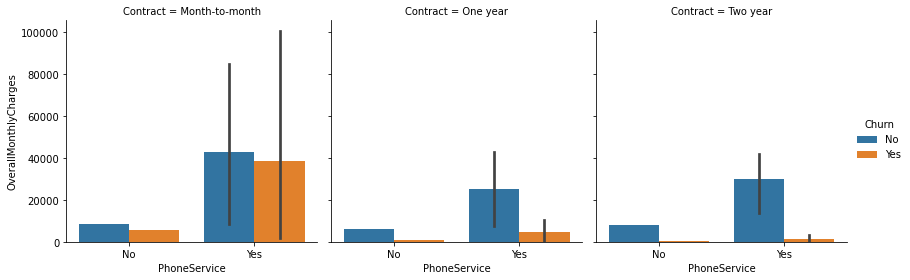

In [13]:
sns.catplot(data = ServiceCharge, col='Contract', height=4, kind='bar', x='PhoneService', y='OverallMonthlyCharges', hue='Churn')
plt.show()

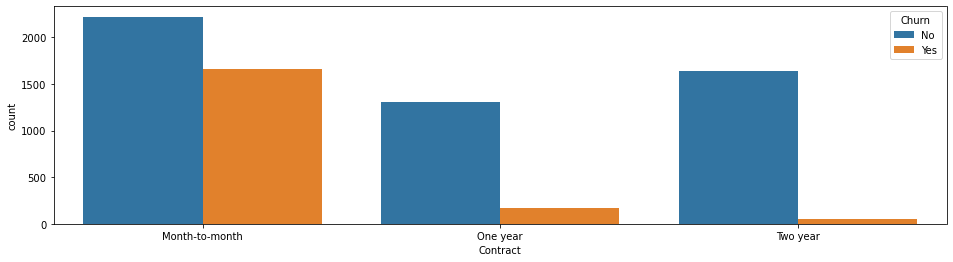

In [14]:
plt.figure(figsize=(16,4))
sns.countplot(data=telco_data, x='Contract', hue='Churn')
plt.show()

 ##   3. Payment: (Use visualizations in explaining your analysis)
   
   ##     a. If the company was to streamline all its services into 3 bouquet packages, what     monthly prices will be appropriate for the following packages to keep customers from churning:  i. Basic ii. Plus iii. Premium

In [15]:
telco_data['MonthlyCharges'].describe().reset_index()


,index,MonthlyCharges
0,count,7032.000000
1,mean,64.798208
2,std,30.085974
3,min,18.250000
4,25%,35.587500
5,50%,70.350000
6,75%,89.862500
7,max,118.750000


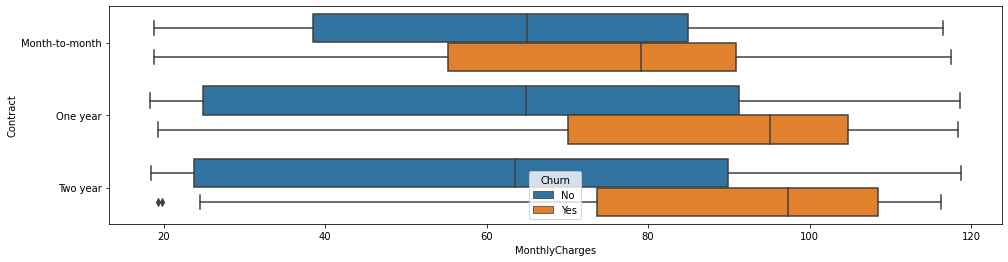

In [16]:
plt.figure(figsize=(16,4))
sns.boxplot(data=telco_data, x='MonthlyCharges',y='Contract',hue='Churn')
plt.show()

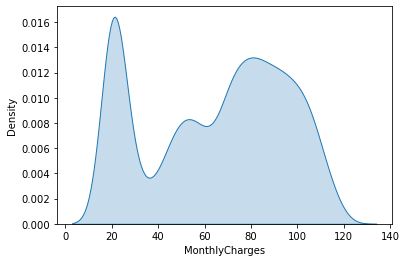

In [17]:
sns.kdeplot(telco_data.MonthlyCharges, shade= True)
plt.show()

1. Basic plan - monthly charge would approximately 35 Dollars
2. Plus plan - monthly charge would aproximately 70 Dollars
3. Premium plan - monthly charge would aproximately 90 Dollars


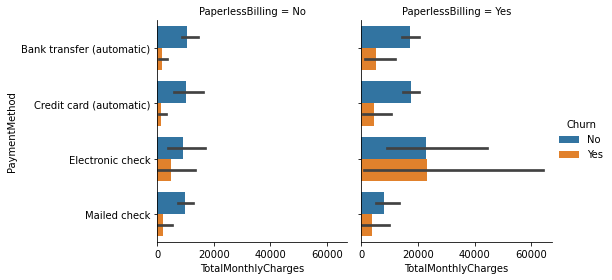

In [18]:
payment = telco_data.groupby(['PaperlessBilling', 'PaymentMethod','Contract','Churn'])['MonthlyCharges'].sum().reset_index(name='TotalMonthlyCharges')
sns.catplot(data = payment, col='PaperlessBilling', height=4, kind='bar', y='PaymentMethod', x='TotalMonthlyCharges', hue='Churn')
plt.show()

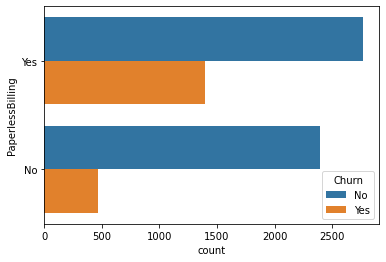

In [19]:
sns.countplot(data=telco_data, y='PaperlessBilling', hue='Churn')
plt.show()

As show in the two graphs above, the company should not strictly go paperless for their monthly billings. This is because customers who use paperlessbilling have a higher churn rate than those who do not. This is more evident to those who use Electonic check as a Payment Method